In [ ]:
#!pip install ftfy regex tqdm
#!pip install git+https://github.com/openai/CLIP.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.8 MB/s eta 0:00:00
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-drjba6ta
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-drjba6ta
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 104.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

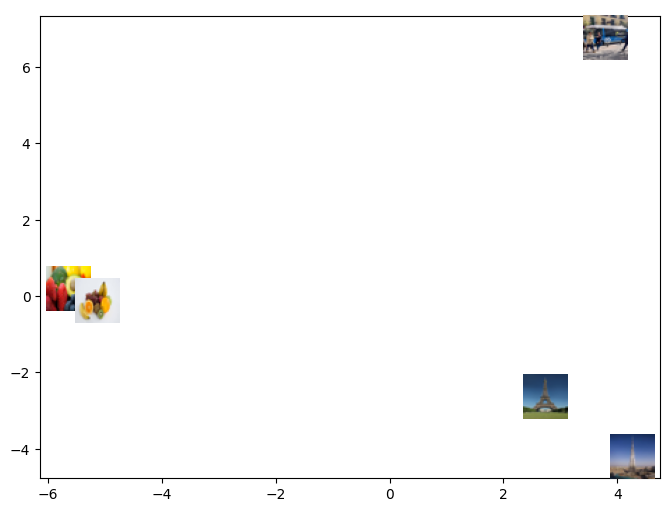

In [ ]:
import clip
import torch
from PIL import Image
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.offsetbox as offsetbox

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

image_paths = [
    "/content/bus.jpg",
    "/content/661967db1a4c6.r_d.619-451.png",
    "/content/800px-Tour_Eiffel_Wikimedia_Commons.jpg",
    "/content/descarga.jpeg",
    "/content/tower.jpeg"
]
images = [preprocess(Image.open(p)).unsqueeze(0).to(device) for p in image_paths]

with torch.no_grad():
    image_features = [model.encode_image(img).cpu().numpy() for img in images]
X = np.vstack(image_features)

X_pca = PCA(n_components=2).fit_transform(X)

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(X_pca[:, 0], X_pca[:, 1])

for i, path in enumerate(image_paths):
    img = Image.open(path).resize((32, 32))
    imagebox = offsetbox.AnnotationBbox(
        offsetbox.OffsetImage(img),
        (X_pca[i, 0], X_pca[i, 1]),
        frameon=False
    )
    ax.add_artist(imagebox)

plt.show()

In [ ]:
# Assuming the figure object from the PCA visualization is still available as 'fig'
# Save the figure to a file
# You can change the filename and format (e.g., .png, .jpg, .svg)
fig.savefig("pca_image_plot_with_thumbnails.png")

print("Plot saved as pca_image_plot_with_thumbnails.png")

Plot saved as pca_image_plot_with_thumbnails.png
